In [261]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ehrapy as ep
from tableone import TableOne
import seaborn as sns

# generate dataset
rng = np.random.default_rng(42)

random_dataset = pd.DataFrame({
    "ethnicity": rng.choice(["asian", "black", "white"], size=150),
    "gender": rng.choice(["male", "female"], size=150),
    "proficiency": rng.choice(["high prof.", "limited prof."], size=150)
    })
random_dataset.head()

,ethnicity,gender,proficiency
0,asian,female,high prof.
1,white,male,limited prof.
2,black,female,high prof.
3,black,male,limited prof.
4,black,male,limited prof.


In [122]:
t1 = TableOne(random_dataset, columns=["ethnicity", "gender", "proficiency"])
t1

Missing    Overall
n                                               150
ethnicity, n (%)   asian               0  43 (28.7)
                   black                  52 (34.7)
                   white                  55 (36.7)
gender, n (%)      female              0  66 (44.0)
                   male                   84 (56.0)
proficiency, n (%) high prof.          0  78 (52.0)
                   limited prof.          72 (48.0)

In [141]:
def get_dicts(table_one):

    cols = ["ethnicity", "gender", "proficiency"]
    col_cats = {"ethnicity": ["asian", "black", "white"],
                "gender": ["male", "female"],
                "proficiency": ["high prof.", "limited prof."]}

    pd.DataFrame(columns=cols)
    dvals = {}
    dpcts = {}
    for col in cols:
        for cat in col_cats[col]:

            val = float(table_one.cat_table["Overall"].loc[(col, cat)].split(" ")[0])
            pct = float(table_one.cat_table["Overall"].loc[(col, cat)].split("(")[1].split(")")[0])
            if cat not in dvals.keys():
                dvals[cat] = [val]
            else:
                dvals[cat].append(val)

            if cat not in dpcts.keys():
                dpcts[cat] = [pct]
            else:
                dpcts[cat].append(pct)

    return dvals, dpcts

dvals, dcpts = get_dicts(t1)
dvals

{'asian': [43.0],
 'black': [52.0],
 'white': [55.0],
 'male': [84.0],
 'female': [66.0],
 'high prof.': [78.0],
 'limited prof.': [72.0]}

In [142]:
dpcts

{'asian': [28.7],
 'black': [34.7],
 'white': [36.7],
 'male': [56.0],
 'female': [44.0],
 'high prof.': [52.0],
 'limited prof.': [48.0]}

In [143]:
random_dataset_2 = random_dataset[:50]
random_dataset_2.shape

In [144]:
t2 = TableOne(random_dataset_2)
t2

Missing    Overall
n                                                50
ethnicity, n (%)   asian               0  12 (24.0)
                   black                  17 (34.0)
                   white                  21 (42.0)
gender, n (%)      female              0  22 (44.0)
                   male                   28 (56.0)
proficiency, n (%) high prof.          0  24 (48.0)
                   limited prof.          26 (52.0)

In [146]:
dvals2, dcpts2 = get_dicts(t2)
dvals2

{'asian': [12.0],
 'black': [17.0],
 'white': [21.0],
 'male': [28.0],
 'female': [22.0],
 'high prof.': [24.0],
 'limited prof.': [26.0]}

In [147]:
dcpts2

{'asian': [24.0],
 'black': [34.0],
 'white': [42.0],
 'male': [56.0],
 'female': [44.0],
 'high prof.': [48.0],
 'limited prof.': [52.0]}

In [151]:
collated_data = {key: values1 + values2 for key, values1, values2 in zip(dpcts.keys(), dpcts.values(), dcpts2.values())}
collated_data

{'asian': [28.7, 24.0],
 'black': [34.7, 34.0],
 'white': [36.7, 42.0],
 'male': [56.0, 56.0],
 'female': [44.0, 44.0],
 'high prof.': [52.0, 48.0],
 'limited prof.': [48.0, 52.0]}

In [155]:
data_ethnicity = {key: value for key, value in collated_data.items() if key in ["asian", "black", "white"]}
data_ethnicity

{'asian': [28.7, 24.0], 'black': [34.7, 34.0], 'white': [36.7, 42.0]}

In [191]:
data_gender = {key: value for key, value in collated_data.items() if key in ["male", "female"]}
data_gender

{'male': [56.0, 56.0], 'female': [44.0, 44.0]}

In [248]:
data_prof = {key: value for key, value in collated_data.items() if key in ["high prof.", "limited prof."]}
data_prof

{'high prof.': [52.0, 48.0], 'limited prof.': [48.0, 52.0]}

In [192]:
{'male': [56.0], 'female': [44.0]}

{'male': [56.0], 'female': [44.0]}

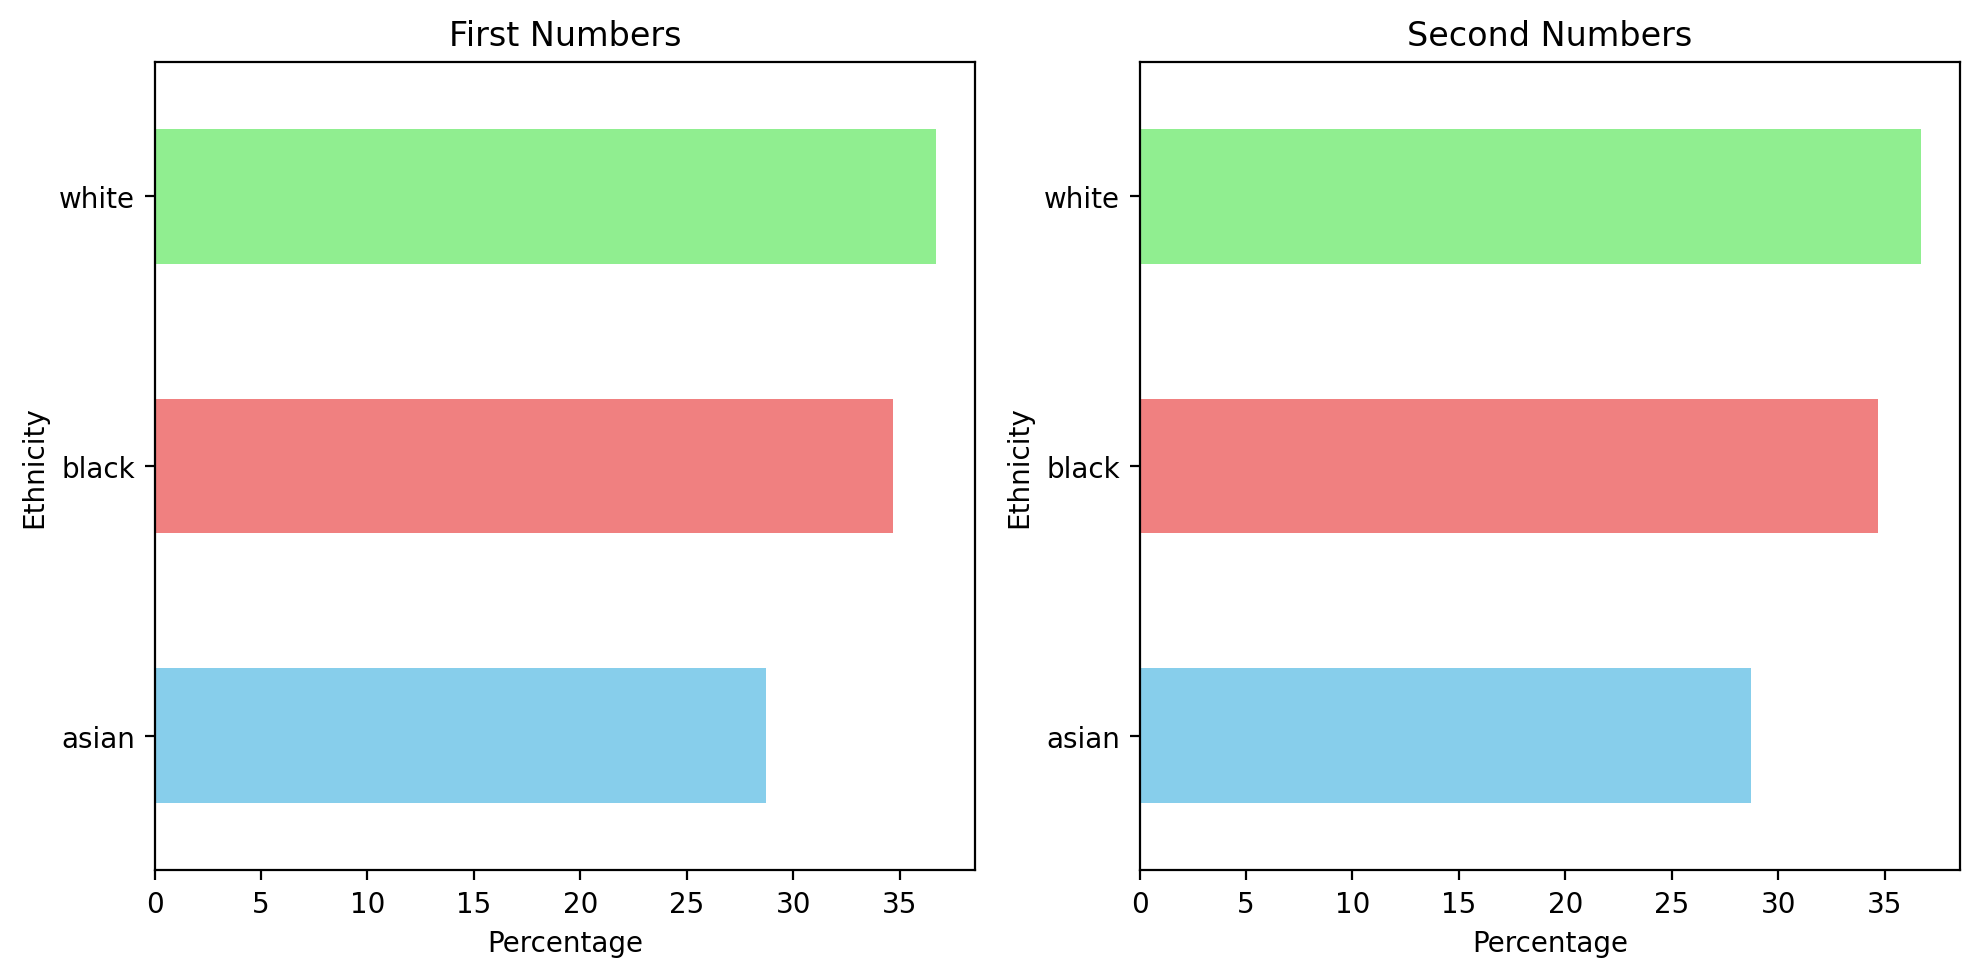

In [171]:
# Convert dictionary to DataFrame
df = pd.DataFrame(data_ethnicity)

# Transpose DataFrame
df= df.T

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# First plot for the first numbers
df.iloc[:,0].plot(kind='barh', stacked=True, ax=axes[0], color=['skyblue', 'lightcoral', 'lightgreen'])
axes[0].set_title('First Numbers')
axes[0].set_xlabel('Percentage')
axes[0].set_ylabel('Ethnicity')

# Second plot for the second numbers
df.iloc[:,0].plot(kind='barh', stacked=True, ax=axes[1], color=['skyblue', 'lightcoral', 'lightgreen'])
axes[1].set_title('Second Numbers')
axes[1].set_xlabel('Percentage')
axes[1].set_ylabel('Ethnicity')

plt.tight_layout()
plt.show()

In [180]:
df.index

Index(['asian', 'black', 'white'], dtype='object')

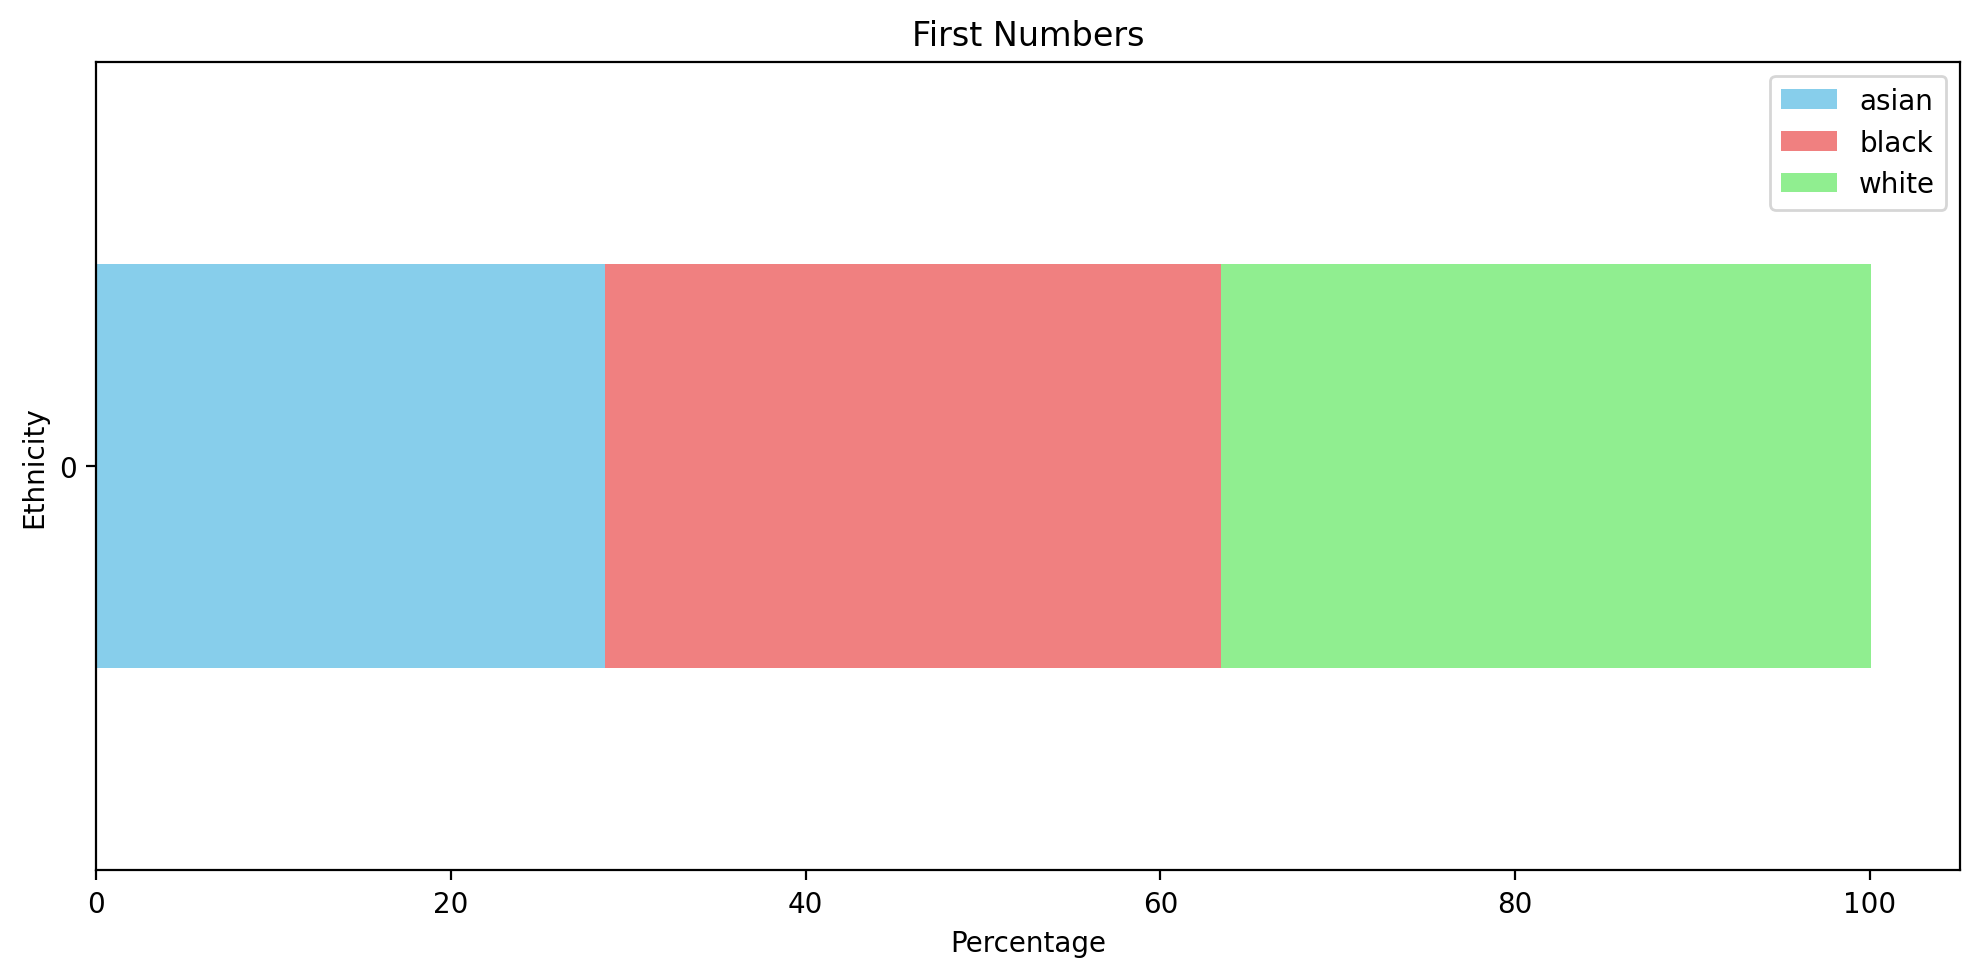

In [189]:
import pandas as pd
import matplotlib.pyplot as plt

# Given dictionary
data = {'asian': [28.7],
        'black': [34.7],
        'white': [36.7]}

# Convert dictionary to DataFrame
df = pd.DataFrame(data)

# Plotting
fig, axes = plt.subplots(figsize=(10, 5))

# Transpose DataFrame
#df = df.T

# Plotting for the first subplot
df.plot(kind='barh', stacked=True, ax=axes, color=['skyblue', 'lightcoral', 'lightgreen'])
axes.set_title('First Numbers')
axes.set_xlabel('Percentage')
axes.set_ylabel('Ethnicity')

# # Plotting for the second subplot
# df.plot(kind='barh', stacked=True, ax=axes[1], color=['skyblue', 'lightcoral', 'lightgreen'])
# axes[1].set_title('Second Numbers')
# axes[1].set_xlabel('Percentage')
# axes[1].set_ylabel('Ethnicity')

plt.tight_layout()
plt.show()


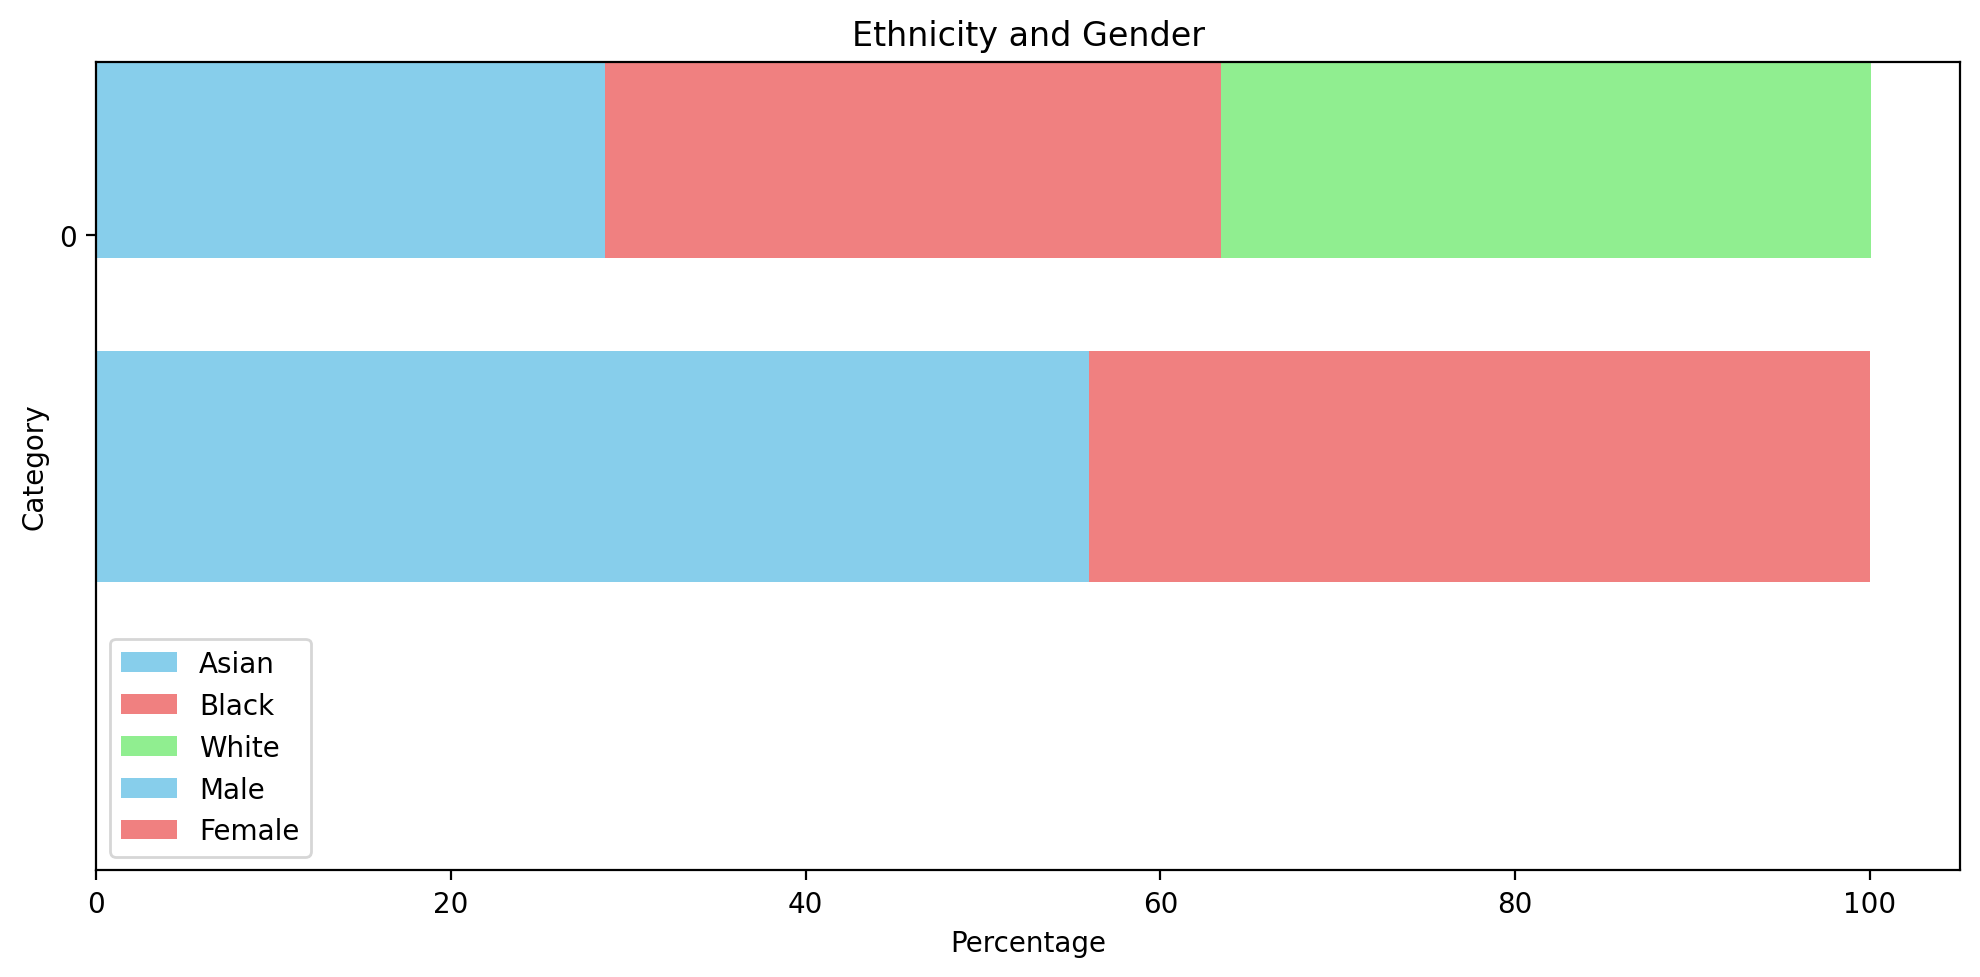

In [251]:
import pandas as pd
import matplotlib.pyplot as plt

# Given data dictionaries
data_ethnicity = {'asian': [28.7],
                  'black': [34.7],
                  'white': [36.7]}

data_gender = {'male': [56.0],
               'female': [44.0]}

data_prof = {'high prof.': [52.0], 'limited prof.': [48.0]}

# Convert dictionaries to DataFrames
df_ethnicity = pd.DataFrame(data_ethnicity)
df_gender = pd.DataFrame(data_gender)

# Plotting
fig, ax = plt.subplots(figsize=(10, 5))

# Plotting for the ethnicity
df_ethnicity.plot(kind='barh', stacked=True, ax=ax, color=['skyblue', 'lightcoral', 'lightgreen'], position=0.1, width=0.2)

# Plotting for the gender with a small gap
df_gender.plot(kind='barh', stacked=True, ax=ax, color=['skyblue', 'lightcoral'], position=1.5, width=0.2)

# Set labels and title
ax.set_title('Ethnicity and Gender')
ax.set_xlabel('Percentage')
ax.set_ylabel('Category')

# Add a legend
ax.legend(['Asian', 'Black', 'White', 'Male', 'Female'])

plt.tight_layout()
plt.show()


In [211]:
df_ethnicity

,asian,black,white
0,28.7,34.7,36.7


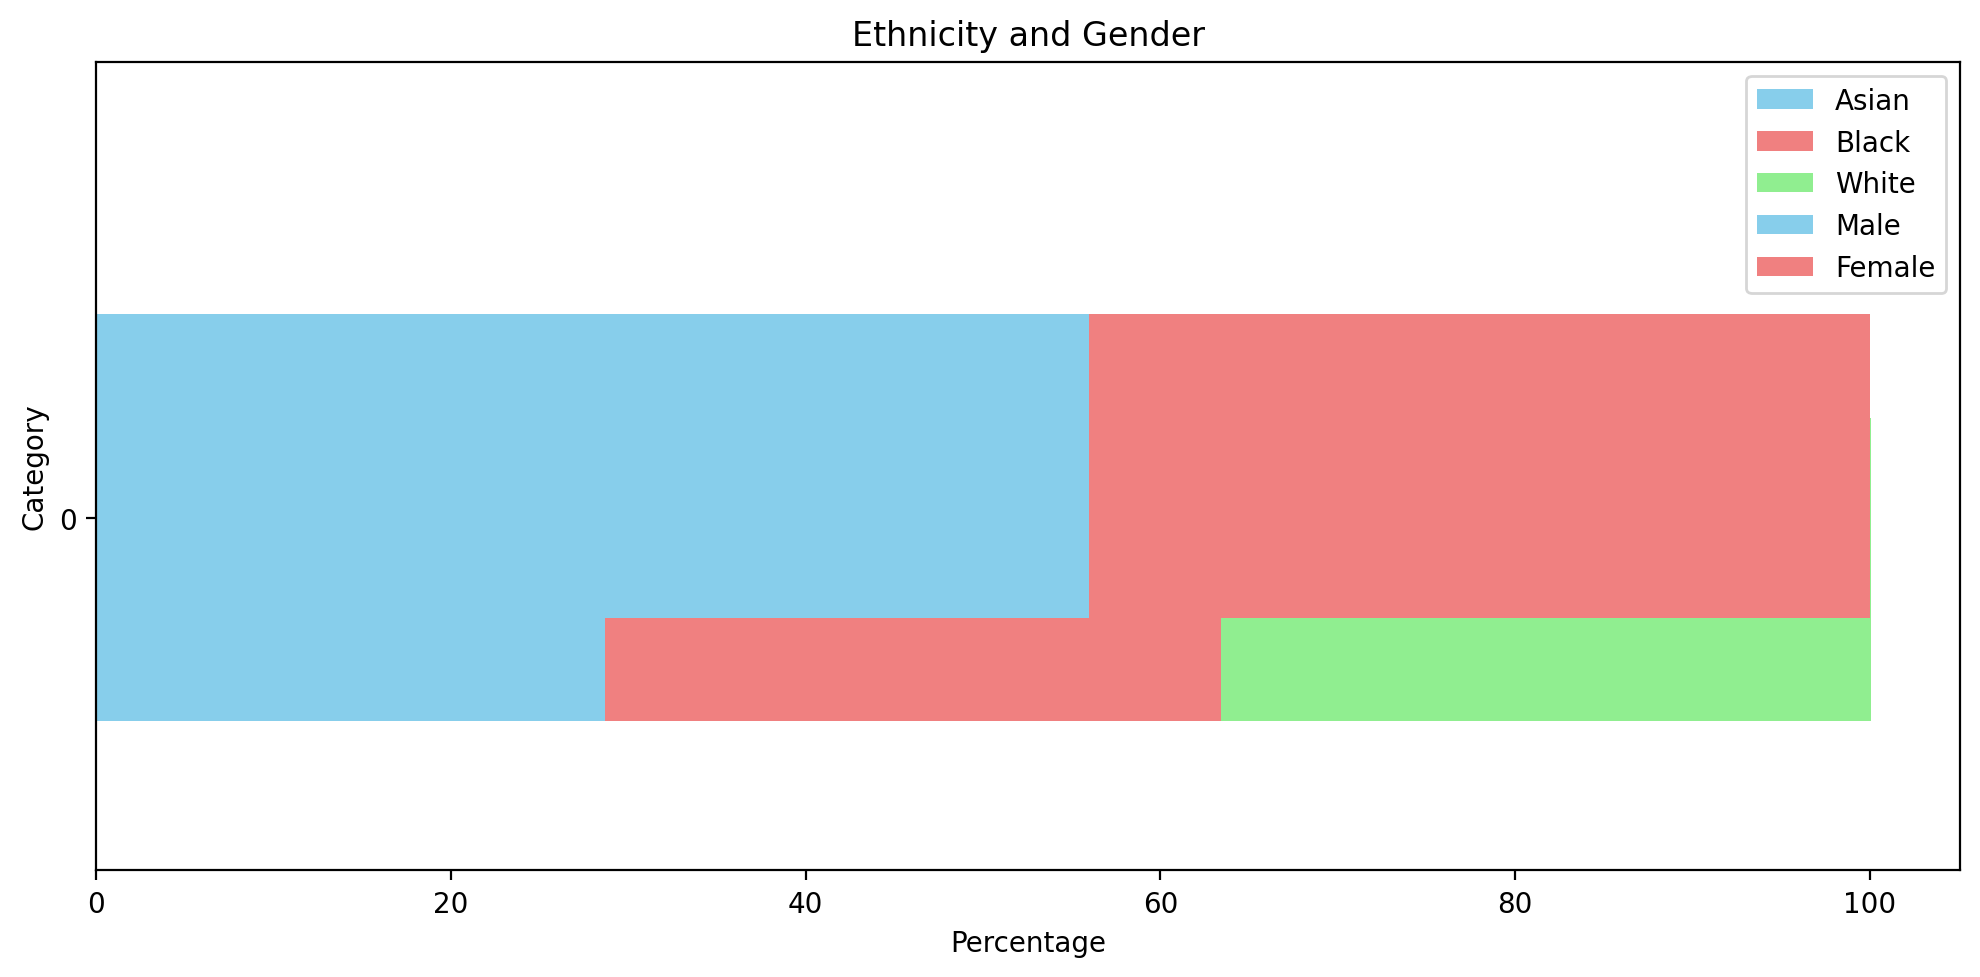

In [215]:
import pandas as pd
import matplotlib.pyplot as plt

# Given data dictionaries
data_ethnicity = {'asian': [28.7],
                  'black': [34.7],
                  'white': [36.7]}

data_gender = {'male': [56.0],
               'female': [44.0]}

# Convert dictionaries to DataFrames
df_ethnicity = pd.DataFrame(data_ethnicity)
df_gender = pd.DataFrame(data_gender)

# Plotting
fig, ax = plt.subplots(figsize=(10, 5))

# Plotting for the ethnicity with a small gap
df_ethnicity.plot(kind='barh', stacked=True, ax=ax, color=['skyblue', 'lightcoral', 'lightgreen'], position=0.67, width=0.3)

# Plotting for the gender with a small gap
df_gender.plot(kind='barh', stacked=True, ax=ax, color=['skyblue', 'lightcoral'], position=0.33, width=0.3)


# Set labels and title
ax.set_title('Ethnicity and Gender')
ax.set_xlabel('Percentage')
ax.set_ylabel('Category')

# Add a legend
ax.legend(['Asian', 'Black', 'White', 'Male', 'Female'])

plt.tight_layout()
plt.show()


In [235]:
l = df_ethnicity.T

In [242]:
for v in l.iterrows():
    print(v[1].values[0])

28.7
34.7
36.7


In [232]:
for u in df_ethnicity.values:
    print(u)

[28.7 34.7 36.7]


In [233]:
for i, value in enumerate(df_ethnicity.T):
    print(value)

0


28.7
34.7
36.7
56.0
44.0
52.0
48.0


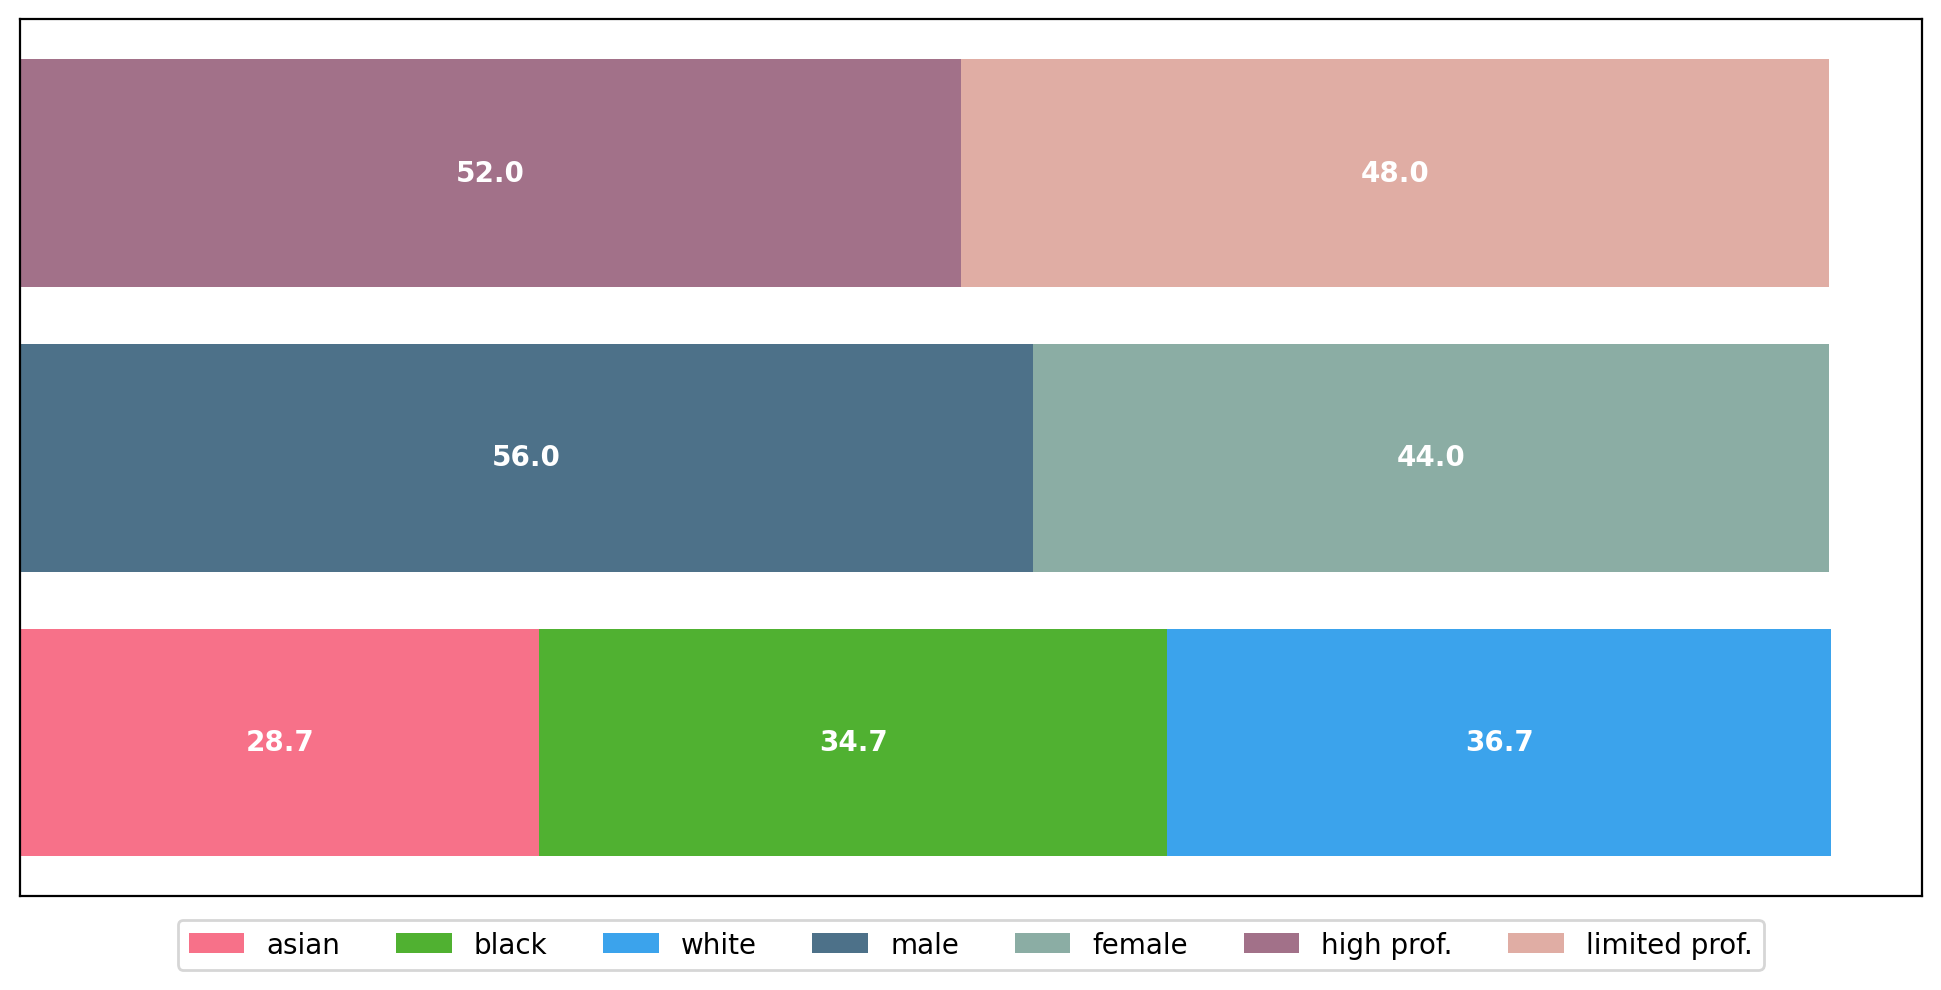

In [271]:
import pandas as pd
import matplotlib.pyplot as plt

# Given data dictionaries
data_ethnicity = {'asian': [28.7],
                  'black': [34.7],
                  'white': [36.7]}

data_gender = {'male': [56.0],
               'female': [44.0]}

data_prof = {'high prof.': [52.0], 'limited prof.': [48.0]}


# Convert dictionaries to DataFrames
df_ethnicity = pd.DataFrame(data_ethnicity)
df_gender = pd.DataFrame(data_gender)
df_prof = pd.DataFrame(data_prof)

# Plotting
fig, ax = plt.subplots(figsize=(10, 5))

# Plotting for the ethnicity with a small gap
#df_ethnicity.plot(kind='barh', stacked=True, ax=ax, color=['skyblue', 'lightcoral', 'lightgreen'], position=0.67, width=0.3)
categories = [df_ethnicity, df_gender, df_prof]
category_labels = ['Ethnicity', 'Gender', 'Proficiency']

colors=['skyblue', 'lightcoral', 'lightgreen'] # TODO: make this dynamic, more colors, pallette per category
legend_labels = []

for pos, data in enumerate([df_ethnicity.T.iterrows(), df_gender.T.iterrows(), df_prof.T.iterrows()]):
    cumwidth = 0
    category = categories[pos]

    hue_shift = pos / len(categories)  # Adjust the hue shift based on the category position
    colors = sns.color_palette("husl", len(category.columns))
    adjusted_colors = [((color[0] + hue_shift) % 1, color[1], color[2]) for color in colors]

    for i, value in enumerate(data):
        value = value[1].values[0]
        print(value)
        ax.barh(pos, value, left=cumwidth, color=adjusted_colors[i], height=0.8)
        

        if value > 5:
            # Add data labels
            width = value
            ax.text(cumwidth + width/2, pos, '{:.1f}'.format(value), ha='center', va='center', color='white', fontweight='bold')
            
        ax.set_yticks([])
        ax.set_xticks([])
        cumwidth += value
        
        #if pos == 0:
        legend_labels.append(category.columns[i])
        
# Plotting for the gender with a small gap
#df_gender.plot(kind='barh', stacked=True, ax=ax, color=['skyblue', 'lightcoral'], position=0.33, width=0.3)

# ax.barh(1, df_gender, color=['skyblue', 'lightcoral', 'lightgreen'])

# # Set labels and title
# ax.set_title('Ethnicity and Gender')
# ax.set_xlabel('Percentage')
# ax.set_ylabel('Category')

# # Add a legend
# ax.legend(['Asian', 'Black', 'White', 'Male', 'Female'])
            
ax.legend(legend_labels, loc='lower center', ncol=len(legend_labels), bbox_to_anchor=(0.5, -0.1))

plt.tight_layout()
plt.show()


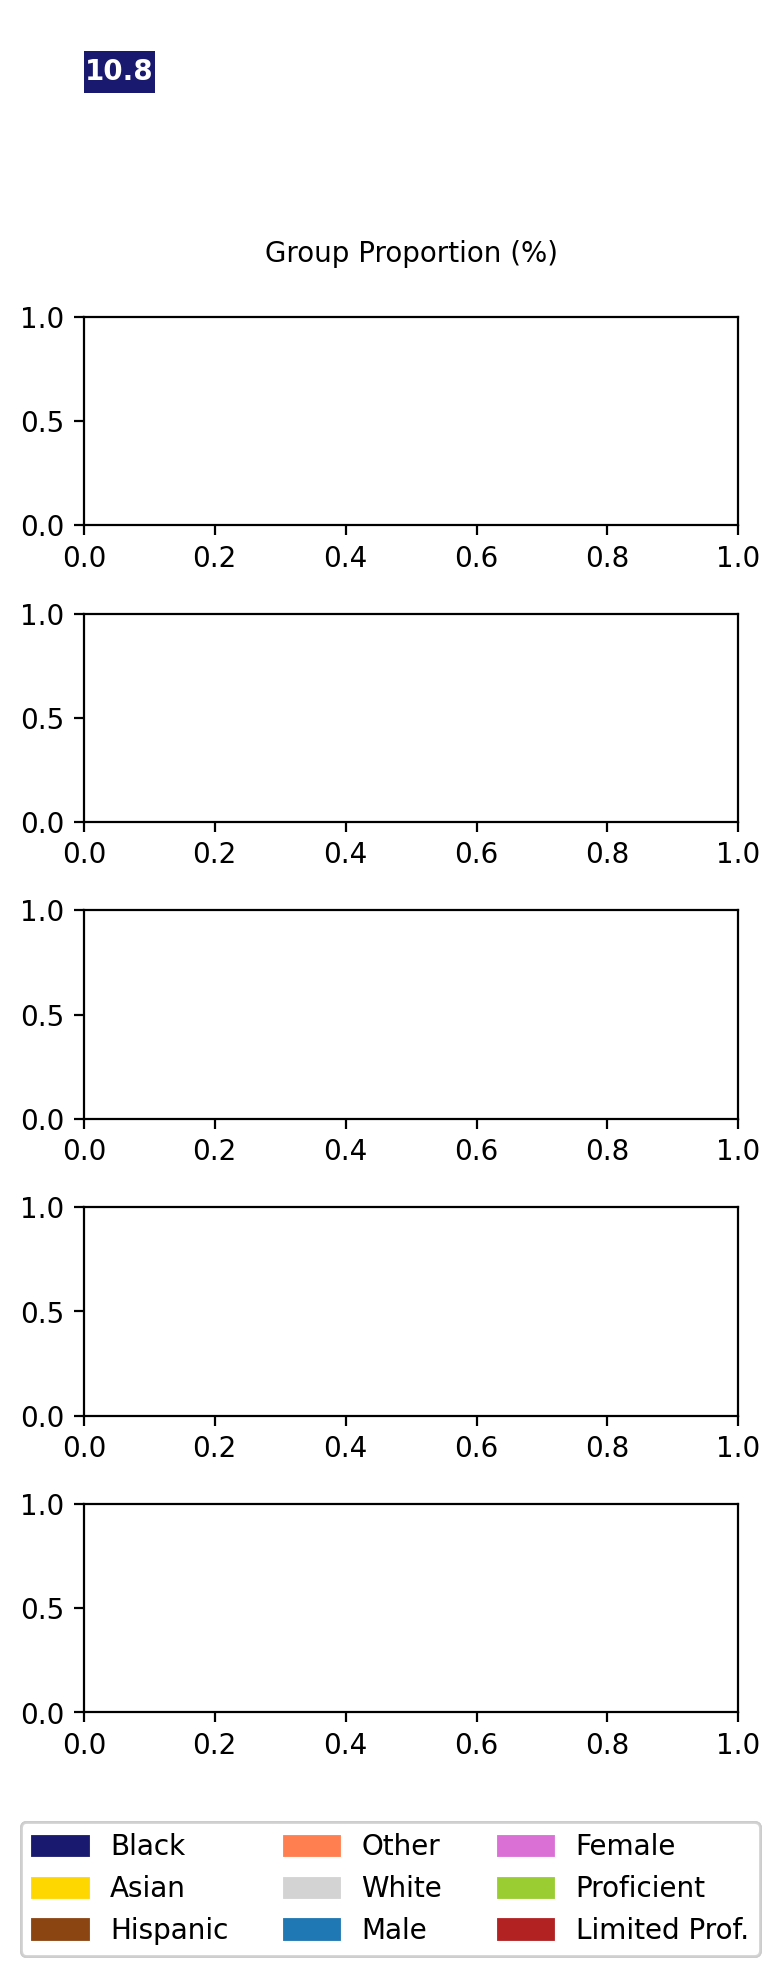

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [9]:

colors_racial = ['midnightblue', 'gold', 'saddlebrown', 'coral', 'lightgrey']
colors_gender = ['tab:blue', 'orchid']
colors_proficiency = ['yellowgreen', 'firebrick']
fig, axes = plt.subplots(6, 1, figsize=(4, 9))
labels = ['Race and Ethnicity', 'Sex', 'English Proficiency']
for i, ax in enumerate(axes):
    # Extract rows
    data_racial = df_racial.iloc[i]
    data_gender = df_gender.iloc[i]
    data_proficiency = df_proficiency.iloc[i]
    
    # For vertical positioning within each lane
    positions = [2, 1, 0]
    for j, (data, colors) in enumerate(zip( [data_racial, data_gender, data_proficiency], [colors_racial, colors_gender, colors_proficiency] )):
        position = positions[j]
        cum_width = 0
        for value, color in zip(data, colors):
            ax.barh(position, value, left=cum_width, color=color, height=.8)
            if value > 5:
                # Add data labels
                width = value
                ax.text(cum_width + width/2, position, '{:.1f}'.format(value), ha='center', va='center', color='white', fontweight='bold')
                cum_width += value
                ax.set_xlim(0, 100)
                ax.set_ylim(-1, 3)
                ax.set_yticks([])
                ax.set_xticks([])
                
                for spine in ax.spines.values():
                    spine.set_visible(False)
                    ax.set_xlabel('Group Proportion (%)')
                    # Add legend to the bottom
                    racial_patches = [plt.Rectangle((0,0),1,1, color=color) for color in colors_racial]
                    gender_patches = [plt.Rectangle((0,0),1,1, color=color) for color in colors_gender]
                    proficiency_patches = [plt.Rectangle((0,0),1,1, color=color) for color in colors_proficiency]
                    racial_labels = ['Black', 'Asian', 'Hispanic', 'Other', 'White']
                    gender_labels = ['Male', 'Female']
                    proficiency_labels = ['Proficient', 'Limited Prof.']
                    legend_handles = racial_patches + gender_patches + proficiency_patches
                    legend_labels = racial_labels + gender_labels + proficiency_labels
                    
                    fig.legend(legend_handles, legend_labels, loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.1))
                
                plt.tight_layout()
                plt.show() 

IndexError: list index out of range

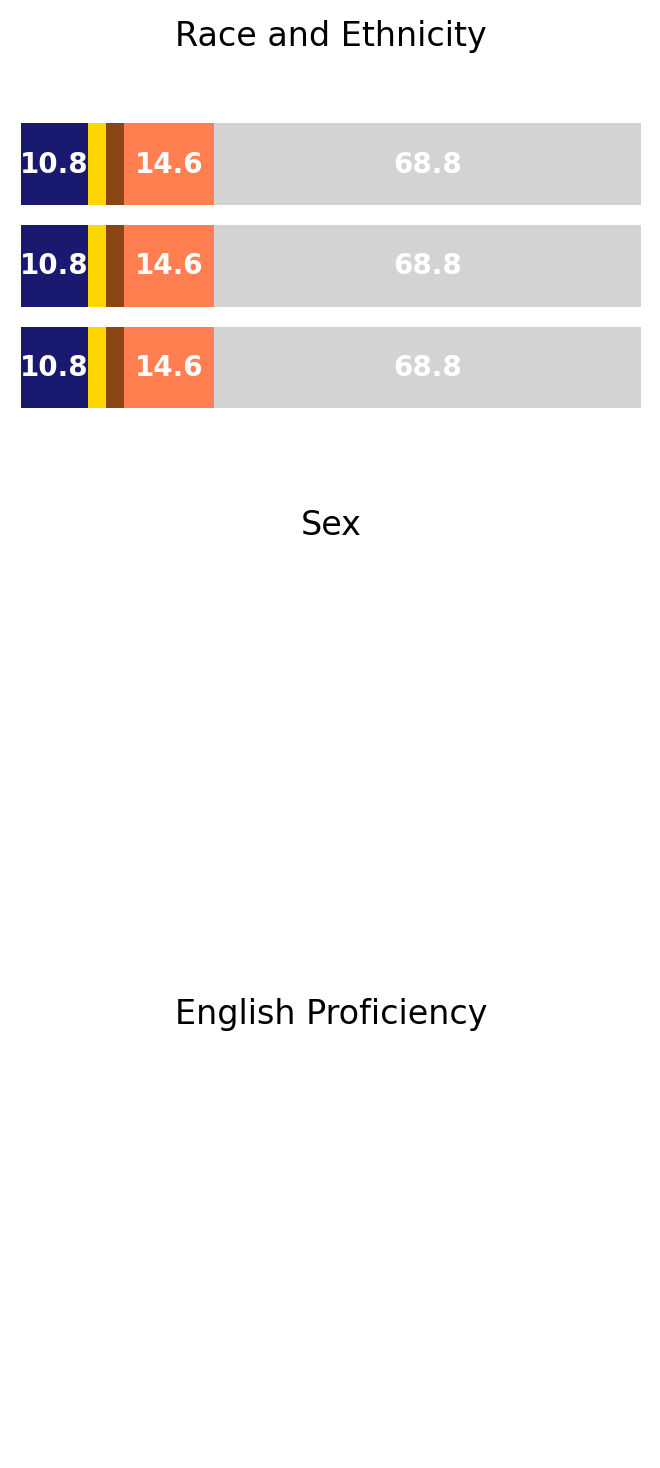

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

# Data dictionaries
racial_data = {'Black': [10.8, 10.8, 10.8, 10, 10, 11.8], 'Asian': [2.9, 2.9, 2.9, 2.8, 2.8, 3.3],
               'Hispanic': [2.9, 2.9, 2.9, 2.8, 2.8, 3.3], 'Other': [14.6, 14.6, 14.6, 15.8, 15.8, 0],
               'White': [68.8, 68.8, 68.8, 68.6, 68.6, 81.6]}

gender_data = {'Male': [55.8, 55.8, 55.9, 58.2, 58.2, 57.6], 'Female': [44.2, 44.2, 44.1, 41.8, 41.8, 42.4]}

proficiency_data = {'Proficient': [89.8, 89.8, 89.2, 89.4, 89.4, 90.2], 'Limited': [10.2, 10.2, 10.8, 10.6, 10.6, 9.8]}

# Creating DataFrames
df_racial = pd.DataFrame(racial_data)
df_gender = pd.DataFrame(gender_data)
df_proficiency = pd.DataFrame(proficiency_data)

colors_racial = ['midnightblue', 'gold', 'saddlebrown', 'coral', 'lightgrey']
colors_gender = ['tab:blue', 'orchid']
colors_proficiency = ['yellowgreen', 'firebrick']

fig, axes = plt.subplots(3, 1, figsize=(4, 9))
labels = ['Race and Ethnicity', 'Sex', 'English Proficiency']

for i, ax in enumerate(axes):
    ax.set_title(labels[i])
    ax.set_xlim(0, 100)
    ax.set_ylim(-1, 3)
    ax.set_yticks([])
    ax.set_xticks([])
    for spine in ax.spines.values():
        spine.set_visible(False)

for ax, data, colors in zip(axes, [df_racial, df_gender, df_proficiency], [colors_racial, colors_gender, colors_proficiency]):
    positions = [2, 1, 0]
    for j, (index, row) in enumerate(data.iterrows()):
        position = positions[j]
        cum_width = 0
        for value, color in zip(row, colors):
            ax.barh(position, value, left=cum_width, color=color, height=0.8)
            if value > 5:
                ax.text(cum_width + value / 2, position, '{:.1f}'.format(value), ha='center', va='center', color='white',
                        fontweight='bold')
            cum_width += value

# Add legend
racial_patches = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors_racial]
gender_patches = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors_gender]
proficiency_patches = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors_proficiency]
racial_labels = ['Black', 'Asian', 'Hispanic', 'Other', 'White']
gender_labels = ['Male', 'Female']
proficiency_labels = ['Proficient', 'Limited Prof.']
legend_handles = racial_patches + gender_patches + proficiency_patches
legend_labels = racial_labels + gender_labels + proficiency_labels
fig.legend(legend_handles, legend_labels, loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.1))

plt.tight_layout()
plt.show()
